In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io
from utils_nn import *
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
in_sz  = 400 #size input layer, 20x20 images
hid_sz = 4 #size hidden layer
out_sz = 10 #number of classes, digits 0 to 9
lamb = 1.0 #regularization 

layers_sz = [in_sz, hid_sz, out_sz]

## Load data

In [3]:
mat = scipy.io.loadmat('../Data/DigitData.mat')
X = mat['X']
y = mat['y']; 
y[y == 10] = 0 #in dataset the digits '0' are labelled as '10', just make them '0' here. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

m, n = X_train.shape

X = X_train
y = y_train

In [4]:
y = y.reshape(len(y))
y_test = y_test.reshape(len(y_test))

## Initialise weights

In [5]:
eps_init = 0.1

initial_Theta1 = InitialiseWeights(in_sz, hid_sz, eps_init);
initial_Theta2 = InitialiseWeights(hid_sz, out_sz, eps_init);

#Unroll parameters from matrices into long vector
nn_params_init = Unroll(initial_Theta1, initial_Theta2)

## Train Network

In [6]:
res = scipy.optimize.minimize(nnCostGrad, nn_params_init, args = (layers_sz, X, y, lamb), method= 'Newton-CG', 
                              tol = 1e-4, jac=True,options={'maxiter': 250})

nn_pars = res.x
Theta1, Theta2 = Roll(nn_pars, layers_sz)

In [7]:
res.success

True

## Accuracies

In [8]:
#training and test predictions.
yhat, probs = predict(Theta1, Theta2, X)
yhat_test, probs_test = predict(Theta1, Theta2, X_test)

In [9]:
#accuracies
acc = np.sum(y==yhat)/float(len(yhat))
acc_test = np.sum(y_test==yhat_test)/float(len(yhat_test))

In [10]:
print('training accuracy %.3f\ntest accuracy %.3f' % (acc, acc_test))

training accuracy 0.898
test accuracy 0.849


# Look at some images

Here we'll plot some images that were correctly or not correctly classified. In title we provide the predicted class as well as the probability of the image belonging to that predicted class (i.e. how certain was the network about the prediction). 

In [11]:
def PlotExamples(samples, labels, probs):
    '''
    samples: mx400 matrix, each rows represents pixels of 20x20 image
    labels: the predicted labels for each of the images provided in samples (use for title)
    probs: probabilities of predicted labels
    '''
    rows = 2; cols = int(len(samples)/2.0)
    fig, axs = plt.subplots(rows,cols, figsize = (5, 5)); axs = axs.ravel()
    
    for i in range(len(samples)):
        axs[i].imshow((np.array(samples[i]).reshape(20,20)).T)
        #axs[i].set_title('Predicted %d, prob %.2f' % (labels[i], probs[i]))   
        axs[i].set_title('Predicted %d' % (labels[i]))                  

### Correct images

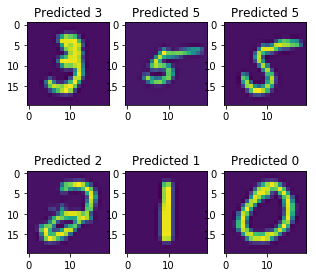

In [12]:
#find some correct images
idx = np.where(y_test == yhat_test)[0][:6]
samples = X_test[idx,:]

PlotExamples(samples, yhat_test[idx], probs_test[idx])

### Incorrect images

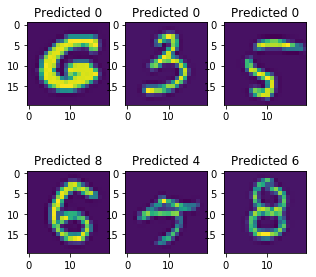

In [13]:
#find some incorrect images
idx = np.where(y_test != yhat_test)[0][:6]
samples = X_test[idx,:] 

PlotExamples(samples,yhat_test[idx], probs_test[idx])    

### Most uncertain images

It looks like the network has some difficulty distinguishing 9's from 4's

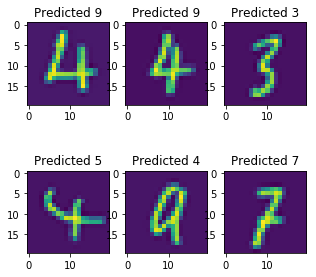

In [14]:
idx = np.argsort(probs_test)[:6]
samples = X_test[idx,:] 

PlotExamples(samples,yhat_test[idx], probs_test[idx])  

### Most certain images

Look at some of the images we're most certain about. Looks like we are pretty certain about our sixes. Some of the incorrect images are also sixes but in those the upper part of the six is more bent, in which case the network thinks it's an 8 or a 0.

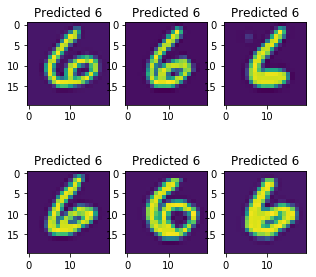

In [15]:
idx = np.argsort(probs_test)[-6:]
samples = X_test[idx,:] 

PlotExamples(samples,yhat_test[idx], probs_test[idx])  